In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats 
import random 
import time 
from mpl_toolkits.mplot3d import Axes3D 

### 1. 


### $H_0: p = 0,01$ 

### $H_1: p > 0,01$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [57]:
α = 0.05 
p0 = 0.01 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.012 0.015 0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1  ]


### binom 0.01

In [58]:
st = time.time() 

powers_total_binom_01 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_01 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 87.81257247924805 seconds


In [59]:
n_mesh_binom_01, p1_mesh_binom_01 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_binom_01 = np.array(powers_total_binom_01).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.01

In [60]:
st = time.time() 

powers_total_arcsin_01 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_01 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.00153112411499 seconds


In [61]:
n_mesh_arcsin_01, p1_mesh_arcsin_01 = np.meshgrid(sample_sizes, p1s) 

powers_mesh_arcsin_01 = np.array(powers_total_arcsin_01).reshape(len(p1s), len(sample_sizes))

In [66]:
import matplotlib as mpl
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.style"] = "normal"

### difference 0.01

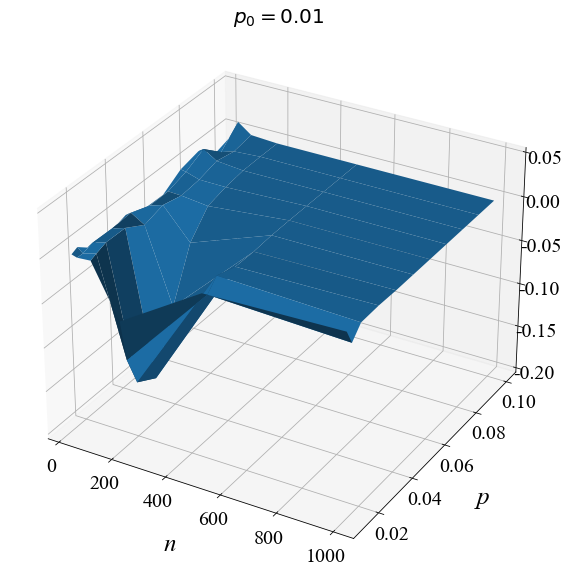

In [78]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_01, p1_mesh_binom_01, powers_mesh_binom_01 - powers_mesh_arcsin_01, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.01$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05])
ax.set_zticklabels(['-0.20', '-0.15', '-0.10', '-0.05','0.00', '0.05'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 2. 


### $H_0: p = 0,02$ 

### $H_1: p > 0,02$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [8]:
α = 0.05 
p0 = 0.02 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.022 0.025 0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11 ]


### binom 0.02

In [9]:
st = time.time() 

powers_total_binom_02 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_02 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 91.95462465286255 seconds


In [10]:
n_mesh_binom_02, p1_mesh_binom_02 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_binom_02 = np.array(powers_total_binom_02).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.02

In [11]:
st = time.time() 

powers_total_arcsin_02 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_02 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.253703355789185 seconds


In [12]:
n_mesh_arcsin_02, p1_mesh_arcsin_02 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_02 = np.array(powers_total_arcsin_02).reshape(len(p1s), len(sample_sizes)) 

### difference 0.02

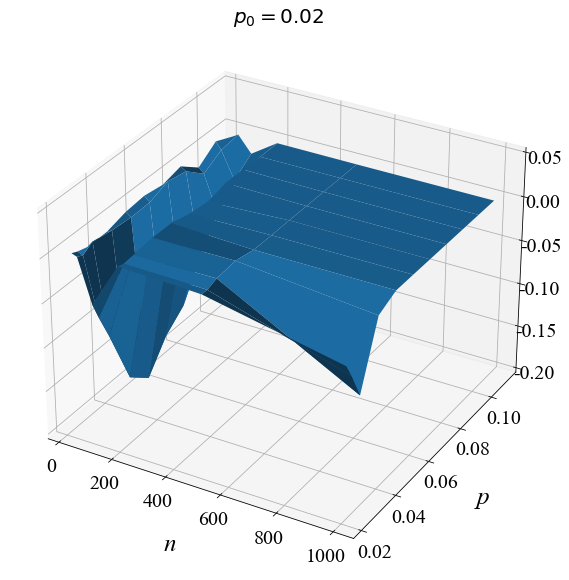

In [79]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_02, p1_mesh_binom_02, powers_mesh_binom_02 - powers_mesh_arcsin_02, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.02$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05])
ax.set_zticklabels(['-0.20', '-0.15', '-0.10', '-0.05','0.00', '0.05'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 3. 


### $H_0: p = 0,03$ 

### $H_1: p > 0,03$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [14]:
α = 0.05 
p0 = 0.03 
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.032 0.035 0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12 ]


In [15]:
st = time.time() 

powers_total_binom_03 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_03 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 94.66973733901978 seconds


In [16]:
n_mesh_binom_03, p1_mesh_binom_03 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_binom_03 = np.array(powers_total_binom_03).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.03

In [17]:
st = time.time() 

powers_total_arcsin_03 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_03 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.316662549972534 seconds


In [18]:
n_mesh_arcsin_03, p1_mesh_arcsin_03 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_03 = np.array(powers_total_arcsin_03).reshape(len(p1s), len(sample_sizes)) 

### difference 0.03

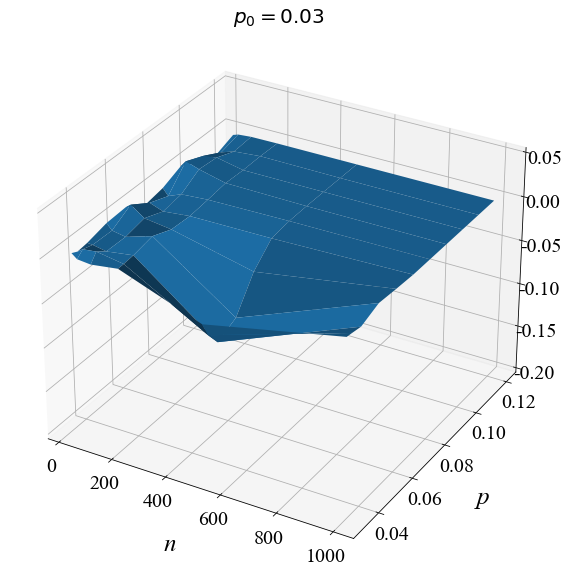

In [80]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_03, p1_mesh_binom_03, powers_mesh_binom_03 - powers_mesh_arcsin_03, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.03$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05])
ax.set_zticklabels(['-0.20', '-0.15', '-0.10', '-0.05','0.00', '0.05'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 4. 


### $H_0: p = 0,04$ 

### $H_1: p > 0,04$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [20]:
α = 0.05 
p0 = 0.04
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.042 0.045 0.05  0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13 ]


### binom 0.04 

In [21]:
st = time.time() 

powers_total_binom_04 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_04 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 95.20029473304749 seconds


In [22]:
n_mesh_binom_04, p1_mesh_binom_04 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_binom_04 = np.array(powers_total_binom_04).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.04

In [23]:
st = time.time() 

powers_total_arcsin_04 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_04 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.268867492675781 seconds


In [24]:
n_mesh_arcsin_04, p1_mesh_arcsin_04 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_04 = np.array(powers_total_arcsin_04).reshape(len(p1s), len(sample_sizes)) 

### difference 0.04

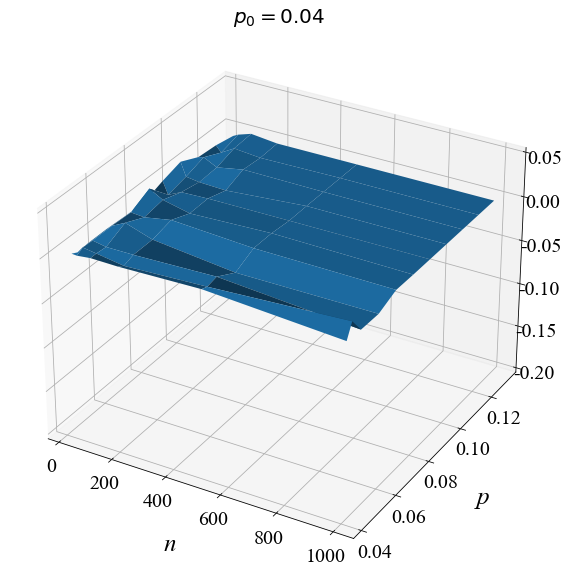

In [81]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_04, p1_mesh_binom_04, powers_mesh_binom_04 - powers_mesh_arcsin_04, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.04$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05])
ax.set_zticklabels(['-0.20', '-0.15', '-0.10', '-0.05','0.00', '0.05'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 5. 


### $H_0: p = 0,05$ 

### $H_1: p > 0,05$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [26]:
α = 0.05 
p0 = 0.05
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.052 0.055 0.06  0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15 ]


### binom 0.05

In [27]:
st = time.time() 

powers_total_binom_05 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_05 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 100.11840200424194 seconds


In [28]:
n_mesh_binom_05, p1_mesh_binom_05 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_binom_05 = np.array(powers_total_binom_05).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.05

In [29]:
st = time.time() 

powers_total_arcsin_05 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_05 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.967424631118774 seconds


In [30]:
n_mesh_arcsin_05, p1_mesh_arcsin_05 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_05 = np.array(powers_total_arcsin_05).reshape(len(p1s), len(sample_sizes)) 

### difference 0.05

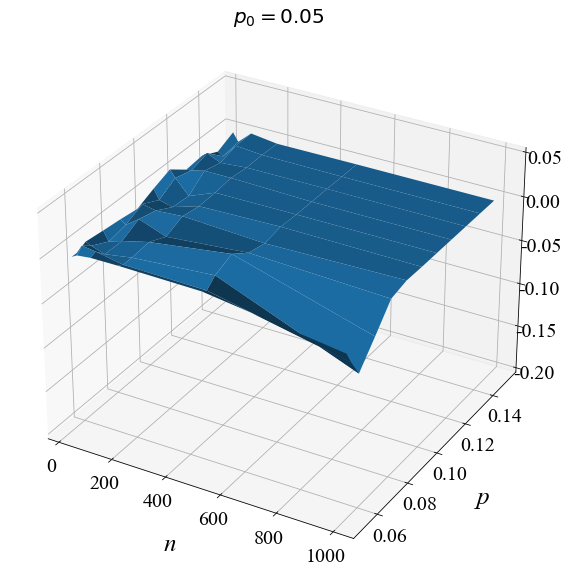

In [82]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_05, p1_mesh_binom_05, powers_mesh_binom_05 - powers_mesh_arcsin_05, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.05$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05])
ax.set_zticklabels(['-0.20', '-0.15', '-0.10', '-0.05','0.00', '0.05'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 6. 


### $H_0: p = 0,06$ 

### $H_1: p > 0,06$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [32]:
α = 0.05 
p0 = 0.06
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 

sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.062 0.065 0.07  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15 ]


### binom 0.06

In [33]:
st = time.time() 

powers_total_binom_06 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_06 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 95.7003059387207 seconds


In [34]:
n_mesh_binom_06, p1_mesh_binom_06 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_binom_06 = np.array(powers_total_binom_06).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.06

In [35]:
st = time.time() 

powers_total_arcsin_06 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_06 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 5.868281602859497 seconds


In [36]:
n_mesh_arcsin_06, p1_mesh_arcsin_06 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_06 = np.array(powers_total_arcsin_06).reshape(len(p1s), len(sample_sizes)) 

### difference 0.06

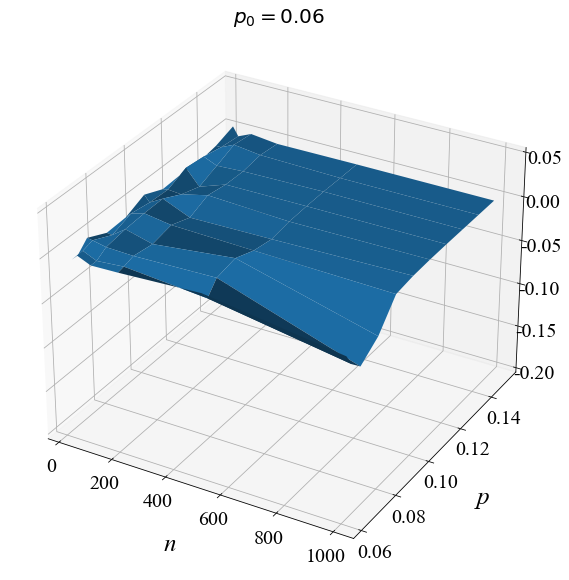

In [83]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_06, p1_mesh_binom_06, powers_mesh_binom_06 - powers_mesh_arcsin_06, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.06$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05])
ax.set_zticklabels(['-0.20', '-0.15', '-0.10', '-0.05','0.00', '0.05'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 10. 


### $H_0: p = 0,1$ 

### $H_1: p > 0,1$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [38]:
α = 0.05 
p0 = 0.1
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.102 0.105 0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19 ]


### binom 0.1

In [39]:
st = time.time() 

powers_total_binom_1 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_1 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 91.71865272521973 seconds


In [40]:
n_mesh_binom_1, p1_mesh_binom_1 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_binom_1 = np.array(powers_total_binom_1).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.1

In [41]:
st = time.time() 

powers_total_arcsin_1 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_1 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.114230155944824 seconds


In [42]:
n_mesh_arcsin_1, p1_mesh_arcsin_1 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_1 = np.array(powers_total_arcsin_1).reshape(len(p1s), len(sample_sizes)) 

### difference 0.1

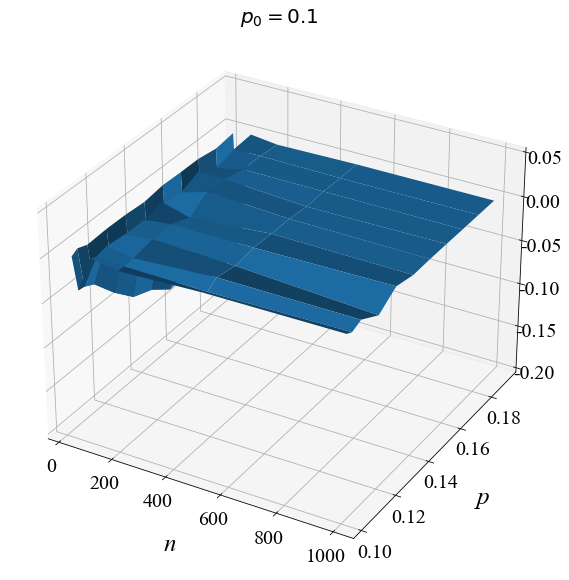

In [84]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_1, p1_mesh_binom_1, powers_mesh_binom_1 - powers_mesh_arcsin_1, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.1$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05])
ax.set_zticklabels(['-0.20', '-0.15', '-0.10', '-0.05','0.00', '0.05'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()

### 15. 


### $H_0: p = 0,15$ 

### $H_1: p > 0,15$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [44]:
α = 0.05 
p0 = 0.15
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.152 0.155 0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23  0.24 ]


### binom 0.15

In [45]:
st = time.time() 

powers_total_binom_15 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_15 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 92.71241354942322 seconds


In [46]:
n_mesh_binom_15, p1_mesh_binom_15 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_binom_15 = np.array(powers_total_binom_15).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.15 

In [47]:
st = time.time() 

powers_total_arcsin_15 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_15 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 6.482819318771362 seconds


In [48]:
n_mesh_arcsin_15, p1_mesh_arcsin_15 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_15 = np.array(powers_total_arcsin_15).reshape(len(p1s), len(sample_sizes)) 

### difference 0.15

<IPython.core.display.Javascript object>


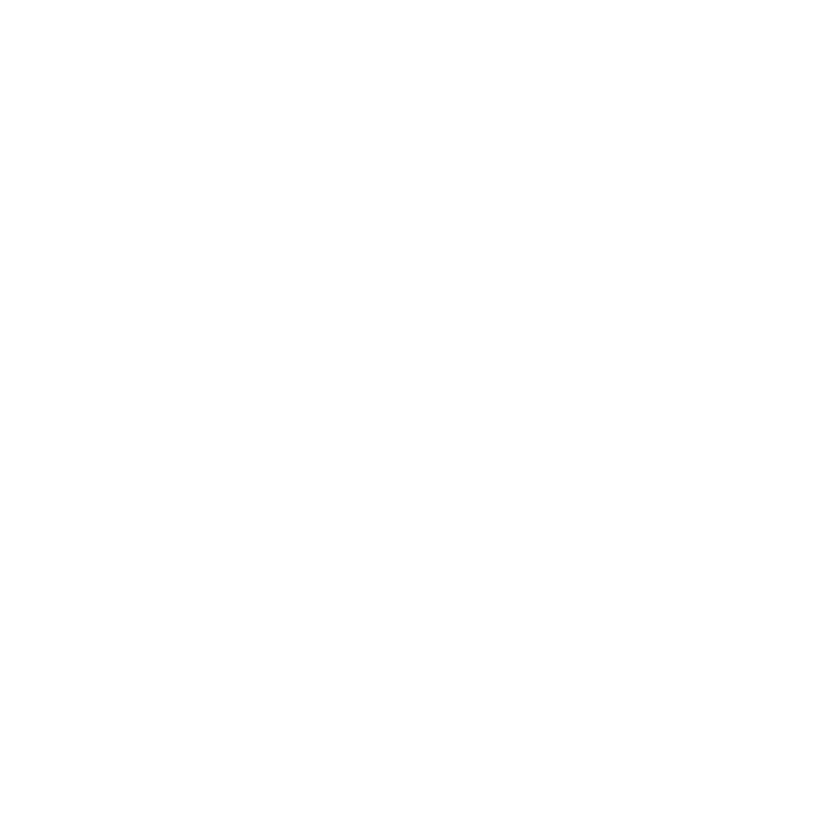

In [49]:
%matplotlib notebook
#%matplotlib inline

fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_15, p1_mesh_binom_15, powers_mesh_binom_15 - powers_mesh_arcsin_15, color = 'tab:blue', alpha = 1) 

ax.set_xlabel('n')
ax.set_ylabel('p1')
#ax.set_zlabel('')
ax.set_title('Difference in power')

#ax.view_init(elev=30, azim=40)

plt.show()

### 20. 


### $H_0: p = 0,2$ 

### $H_1: p > 0,2$ 

Zakładamy, że prawdziwa jest $H_1$. 

In [50]:
α = 0.05 
p0 = 0.2
z_α = stats.norm.ppf(0.95, 0, 1)
print(z_α) 
sample_sizes = np.array([30, 50, 100, 200, 500, 1000])
print(sample_sizes) 
p1s = np.array( [p0 + 0.002, p0 + 0.005] + list(np.arange(p0 + 0.01, p0 + 0.1, 0.01)) )
print(p1s) 

1.6448536269514722
[  30   50  100  200  500 1000]
[0.202 0.205 0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3  ]


### binom 0.2

In [51]:
st = time.time() 

powers_total_binom_2 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n)) 
        ys = samples.sum(axis = 1) 
        
        decisions = [None] * 10000
        
        for i, y in enumerate(ys): 
            result = stats.binomtest(y, n, p0, alternative = "greater")
            if (result.pvalue <= α): 
                decisions[i] = 0 
            else: 
                decisions[i] = 1 
              
        type_II_error_sim = np.mean(decisions)
        power_sim = 1 - type_II_error_sim 
        
        powers_per_n[k] = power_sim 
    
    powers_total_binom_2 += powers_per_n 
    
print()
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds') 


Execution time: 103.39359331130981 seconds


In [52]:
n_mesh_binom_2, p1_mesh_binom_2 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_binom_2 = np.array(powers_total_binom_2).reshape(len(p1s), len(sample_sizes)) 

### arcsin 0.2

In [53]:
st = time.time() 

powers_total_arcsin_2 = []

for p1 in p1s: 

    powers_per_n = [None] * len(sample_sizes)

    for k, n in enumerate(sample_sizes): 
    
        samples = np.random.binomial(1, p1, (10000, n))
        proportion_estimates = samples.sum(axis = 1) / n 
        ϕs = 2 * np.arcsin(np.sqrt(proportion_estimates)) 
        z_values = ( ϕs - 2 * np.arcsin(np.sqrt(p0)) ) * np.sqrt(n) 
        decisions = (z_values < z_α).astype(int) 
        type_II_error_sim = np.mean(decisions) 
        power_sim = 1 - type_II_error_sim 
    
        powers_per_n[k] = power_sim 
    
    powers_total_arcsin_2 += powers_per_n 
    
print() 
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')


Execution time: 7.711184740066528 seconds


In [54]:
n_mesh_arcsin_2, p1_mesh_arcsin_2 = np.meshgrid(sample_sizes, p1s) 
powers_mesh_arcsin_2 = np.array(powers_total_arcsin_2).reshape(len(p1s), len(sample_sizes))

### difference 0.2

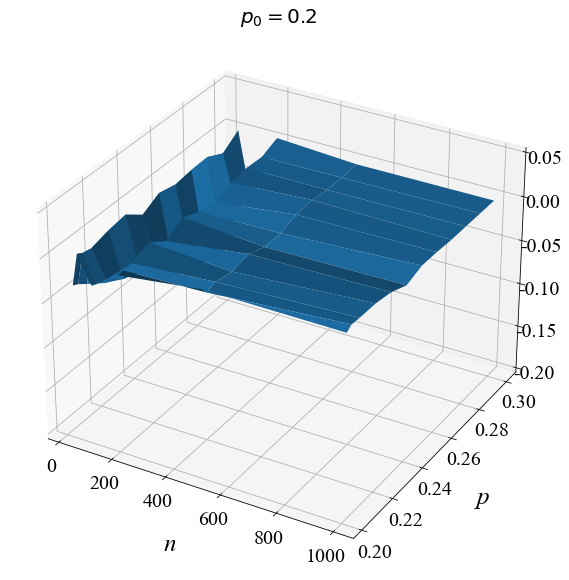

In [85]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize = (10, 10)) 
ax = fig.add_subplot(111, projection = '3d') 

ax.plot_surface(n_mesh_binom_2, p1_mesh_binom_2, powers_mesh_binom_2 - powers_mesh_arcsin_2, color = 'tab:blue', alpha = 1) 

# Set labels and title
ax.set_xlabel('n', fontsize = 25, labelpad = 20, fontstyle = 'italic')
ax.set_ylabel('p', fontsize = 25, labelpad = 20, fontstyle = 'italic')
#ax.set_zlabel('power', fontsize = 20, rotation = 150, labelpad = 20, fontstyle = 'italic') 
ax.set_title("$p_0 = 0.2$", fontsize = 20, fontstyle = 'italic') 
#z_label = ax.text2D(.95, .83, 'power', fontsize = 25, fontstyle = 'italic',
                    #transform = ax.transAxes, rotation = 360)

plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 

ax.set_zticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05])
ax.set_zticklabels(['-0.20', '-0.15', '-0.10', '-0.05','0.00', '0.05'], fontsize = 20)

ax.view_init(elev = 30, azim = -60)

plt.show()